In [45]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import sys
import csv
import functools
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

csv.field_size_limit(1000000000000000000)

1000000000000000000

In [2]:
# importing the yearly device files as dataframes
device2000 = pd.read_csv('DEVICE2000.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2001 = pd.read_csv('DEVICE2001.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2002 = pd.read_csv('DEVICE2002.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2003 = pd.read_csv('DEVICE2003.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2004 = pd.read_csv('DEVICE2004.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2005 = pd.read_csv('DEVICE2005.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2006 = pd.read_csv('DEVICE2006.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2007 = pd.read_csv('DEVICE2007.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2008 = pd.read_csv('DEVICE2008.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2009 = pd.read_csv('DEVICE2009.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2010 = pd.read_csv('DEVICE2010.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2011 = pd.read_csv('DEVICE2011.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2012 = pd.read_csv('DEVICE2012.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2013 = pd.read_csv('DEVICE2013.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2014 = pd.read_csv('DEVICE2014.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2015 = pd.read_csv('DEVICE2015.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2016 = pd.read_csv('DEVICE2016.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2017 = pd.read_csv('DEVICE2017.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2018 = pd.read_csv('DEVICE2018.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2019 = pd.read_csv('DEVICE2019.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)
device2020 = pd.read_csv('DEVICE2020.txt', sep="|", header = 0, dtype=str, engine='python', quoting=3)

In [3]:
# joining the yearly device files
DEVICE = device2000
deviceYearlyFiles = [device2001,device2002,device2003,device2004,device2005,device2006,device2007,device2008,device2009,
          device2010,device2011,device2012,device2013,device2014,device2015,device2016,device2017,device2018,device2019,
          device2020]
for yearlyFile in deviceYearlyFiles:
    DEVICE = DEVICE.append(yearlyFile)

In [4]:
for col in DEVICE.columns:
    print(col)

MDR_REPORT_KEY
DEVICE_EVENT_KEY
IMPLANT_FLAG
DATE_REMOVED_FLAG
DEVICE_SEQUENCE_NO
DATE_RECEIVED
BRAND_NAME
GENERIC_NAME
MANUFACTURER_D_NAME
MANUFACTURER_D_ADDRESS_1
MANUFACTURER_D_ADDRESS_2
MANUFACTURER_D_CITY
MANUFACTURER_D_STATE_CODE
MANUFACTURER_D_ZIP_CODE
MANUFACTURER_D_ZIP_CODE_EXT
MANUFACTURER_D_COUNTRY_CODE
MANUFACTURER_D_POSTAL_CODE
DEVICE_OPERATOR
EXPIRATION_DATE_OF_DEVICE
MODEL_NUMBER
CATALOG_NUMBER
LOT_NUMBER
OTHER_ID_NUMBER
DEVICE_AVAILABILITY
DATE_RETURNED_TO_MANUFACTURER
DEVICE_REPORT_PRODUCT_CODE
DEVICE_AGE_TEXT
DEVICE_EVALUATED_BY_MANUFACTUR
COMBINATION_PRODUCT_FLAG


In [14]:
# remove all entries that are not in cohort 1
dfLWS = DEVICE[DEVICE['DEVICE_REPORT_PRODUCT_CODE']=='LWS']
dfMRM = DEVICE[DEVICE['DEVICE_REPORT_PRODUCT_CODE']=='MRM']
dfNIK = DEVICE[DEVICE['DEVICE_REPORT_PRODUCT_CODE']=='NIK']
dfNVY = DEVICE[DEVICE['DEVICE_REPORT_PRODUCT_CODE']=='NVY']    

DEVICE = pd.concat([dfLWS, dfMRM, dfNIK, dfNVY])
DEVICE['DEVICE_REPORT_PRODUCT_CODE'].value_counts(dropna=False)

LWS    237839
NIK    107783
NVY     83869
MRM      4989
Name: DEVICE_REPORT_PRODUCT_CODE, dtype: int64

In [9]:
# find columns to keep and drop
DEVICE['BRAND_NAME'].value_counts(dropna=False)

DEXCOM G5 MOBILE CONTINUOUS GLUCOSE MONITORING SYSTEM    326644
DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM           312282
PARADIGM REAL-TIME REVEL INSULIN INFUSION PUMP           175166
NaN                                                      141945
SPECTRUM INFUSION PUMP                                   135495
                                                          ...  
CONFORM BINDER SUBMALAR FACIAL IMPLANT, SMALL                 1
AIM-100                                                       1
BIOMET ACET SHELL                                             1
PULL PEG SD 20F PULL KIT                                      1
UNKNOWN DEPUY 58X32MM POLY LINER                              1
Name: BRAND_NAME, Length: 437705, dtype: int64

In [15]:
# define columns to keep in DEVICE file
keptCols = ['MDR_REPORT_KEY', 'DEVICE_SEQUENCE_NO','DATE_RECEIVED','BRAND_NAME','GENERIC_NAME'
                , 'MANUFACTURER_D_NAME','DEVICE_OPERATOR','MODEL_NUMBER','DEVICE_REPORT_PRODUCT_CODE'
                , 'DEVICE_AGE_TEXT','DEVICE_EVALUATED_BY_MANUFACTUR', 'DEVICE_SEQUENCE_NO']

In [17]:
DEVICE = DEVICE[keptCols]

In [40]:
# working with the dates of reports
DEVICE['DATE_RECEIVED'].value_counts(dropna=False)

2014/01/13    4597
2009/11/10    3274
2008/05/08    3010
2010/02/10    2642
2009/05/08    2631
              ... 
2004/10/28       1
2007/12/12       1
2008/10/07       1
2013/03/10       1
2004/01/30       1
Name: DATE_RECEIVED, Length: 5508, dtype: int64

In [41]:
pd.DatetimeIndex(DEVICE['DATE_RECEIVED']).year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='DATE_RECEIVED', length=434480)

In [42]:
DEVICE['year'] = pd.DatetimeIndex(DEVICE['DATE_RECEIVED']).year

In [46]:
DEVICE.head()

,MDR_REPORT_KEY,DEVICE_SEQUENCE_NO,DATE_RECEIVED,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,DEVICE_OPERATOR,MODEL_NUMBER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,DEVICE_SEQUENCE_NO,year
71,257484,1,2000/01/06,CADET V-105 SERIES TIERED THERAPY DEFIBRILLATOR,IMPLANTABLE CARDIAC DEFIBRILLATOR,"ST. JUDE MEDICAL, INC., CRMD",0HP,V-105C,LWS,3 YR,Y,1,2000
197,257721,1,2000/01/06,VENTRITEX V-175-C,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,ST. JUDE MEDICAL,0HP,V-175-C,LWS,NaN,NaN,1,2000
252,257784,1,2000/01/04,MEDTRONIC ICD,IMPLANTABLE CARDIAC DEFIBRILLATOR,"MEDTRONIC, INC.",0HP,7271,LWS,*,NaN,1,2000
267,257800,1,2000/02/29,CONTOUR MD V-175 SERIES TIERED THERAPY DEFIB.,IMPLANTABLE CARDIAC DEFIBRILLATOR,"ST. JUDE MEDICAL, INC., CRMD",0HP,V-175C,LWS,9 MO,Y,1,2000
268,257801,1,2000/01/07,ANGSTROM MD SERIES TIERED THERAPY DEFIBRILLATOR,IMPLANTABLE CARDIAC DEFIBRILLATOR,"ST. JUDE MEDICAL, INC., CRMD",0HP,V-190HV3,LWS,2 YR,Y,1,2000


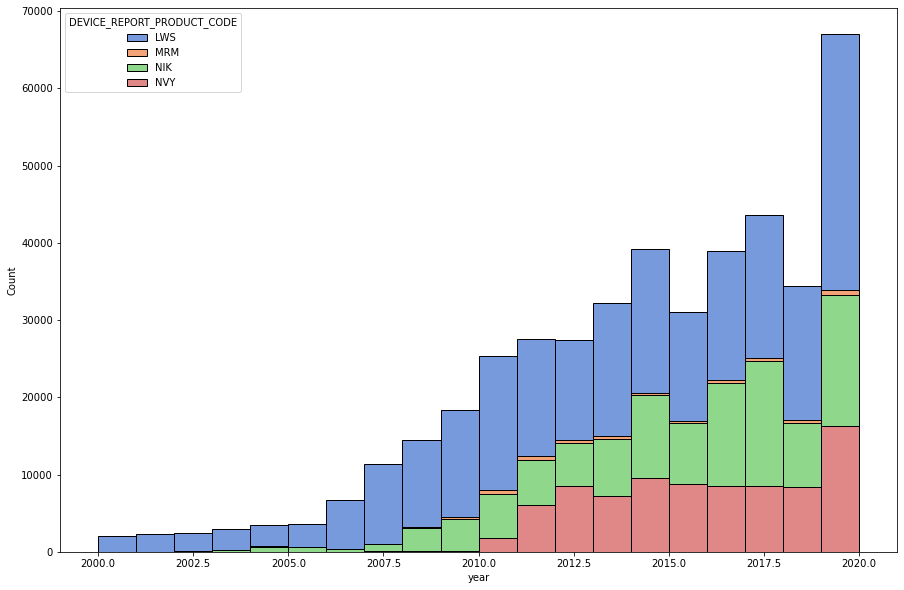

In [91]:
plt.figure(figsize=(15,10))
p = sns.histplot(
    DEVICE,
    x="year",
    hue='DEVICE_REPORT_PRODUCT_CODE',
    multiple="stack",
    palette="muted",
    binwidth=1 
)


In [93]:
# drop duplicate report key values
s=DEVICE['MDR_REPORT_KEY'].duplicated(keep='first')
indexDupeReportkey = s[s].index
len(indexDupeReportkey)

509

In [95]:
DEVICE= DEVICE.drop_duplicates(subset=['MDR_REPORT_KEY'], keep='first')

In [96]:
s=DEVICE['MDR_REPORT_KEY'].duplicated(keep='first')
indexDupeReportkey = s[s].index
len(indexDupeReportkey)

0

In [97]:
DEVICE.shape

(433971, 13)

In [98]:
# pickle it
DEVICE.to_pickle('./3_DEVICE_File.pkl')